In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
import os
import collections

In [10]:
# basedir = "/data/franco/disorder_flavours/local_umap_calc/umap_data/"
basedir = "/data/franco/disorder_flavours/eulogia/umap_data/"
umap_datadict = dict()
for f in os.listdir(basedir):
    print(f)
    arr = f[:-4].strip().split("_")
    neighbors = int(arr[1])
    dist      = float(arr[2])
    df = pd.read_table(basedir+f, sep=" ", header=None)
    key = f"{neighbors}_{dist}"
    umap_datadict[key] = df.values
    

umap_100_0.25.txt
umap_200_0.01.txt
umap_200_0.25.txt
umap_200_0.001.txt
umap_100_0.001.txt
umap_60_0.01.txt
umap_30_0.9.txt
umap_30_0.01.txt
umap_10_0.25.txt
umap_60_0.5.txt
umap_30_0.25.txt
umap_200_0.5.txt
umap_10_0.001.txt
umap_30_0.001.txt
umap_200_0.9.txt
umap_5_0.9.txt
umap_60_0.9.txt
umap_5_0.01.txt
umap_60_0.25.txt
umap_5_0.001.txt
umap_200_0.1.txt
umap_60_0.001.txt
umap_10_0.9.txt
umap_30_0.5.txt
umap_5_0.5.txt
umap_10_0.1.txt
umap_100_0.9.txt
umap_100_0.01.txt
umap_5_0.25.txt
umap_100_0.1.txt
umap_5_0.1.txt
umap_10_0.5.txt
umap_30_0.1.txt
umap_10_0.01.txt
umap_100_0.5.txt
umap_60_0.1.txt


In [12]:
# load seq and annotation data
seqfile = "disprot_plotdata/halft5/seq_data.txt"
annfile = "disprot_plotdata/halft5/annot_data.txt"

with open(seqfile) as instr:
    seq = instr.readlines()[0]
    
with open(annfile) as instr:
    annot = instr.readlines()[0]
    
print(len(seq), len(annot))

903246 903246


In [13]:
SEQ = [aa for aa in seq]
ANNOT = [an for an in annot]
AAs = set(SEQ)

In [14]:
# embedmatfiledf. = "/data/franco/disorder_flavours/disprot_plotdata/halft5/embedding_data.txt.npz"

# import time
# s = time.time()
# print("Loading embedding..")
# loaded_data = np.load(embedmatfile)
# embeddings = loaded_data["concat_emb"]
# e = time.time() - s
# print(f"Loaded in {e}!")
# print(np.array(embeddings).shape)

100_0.25


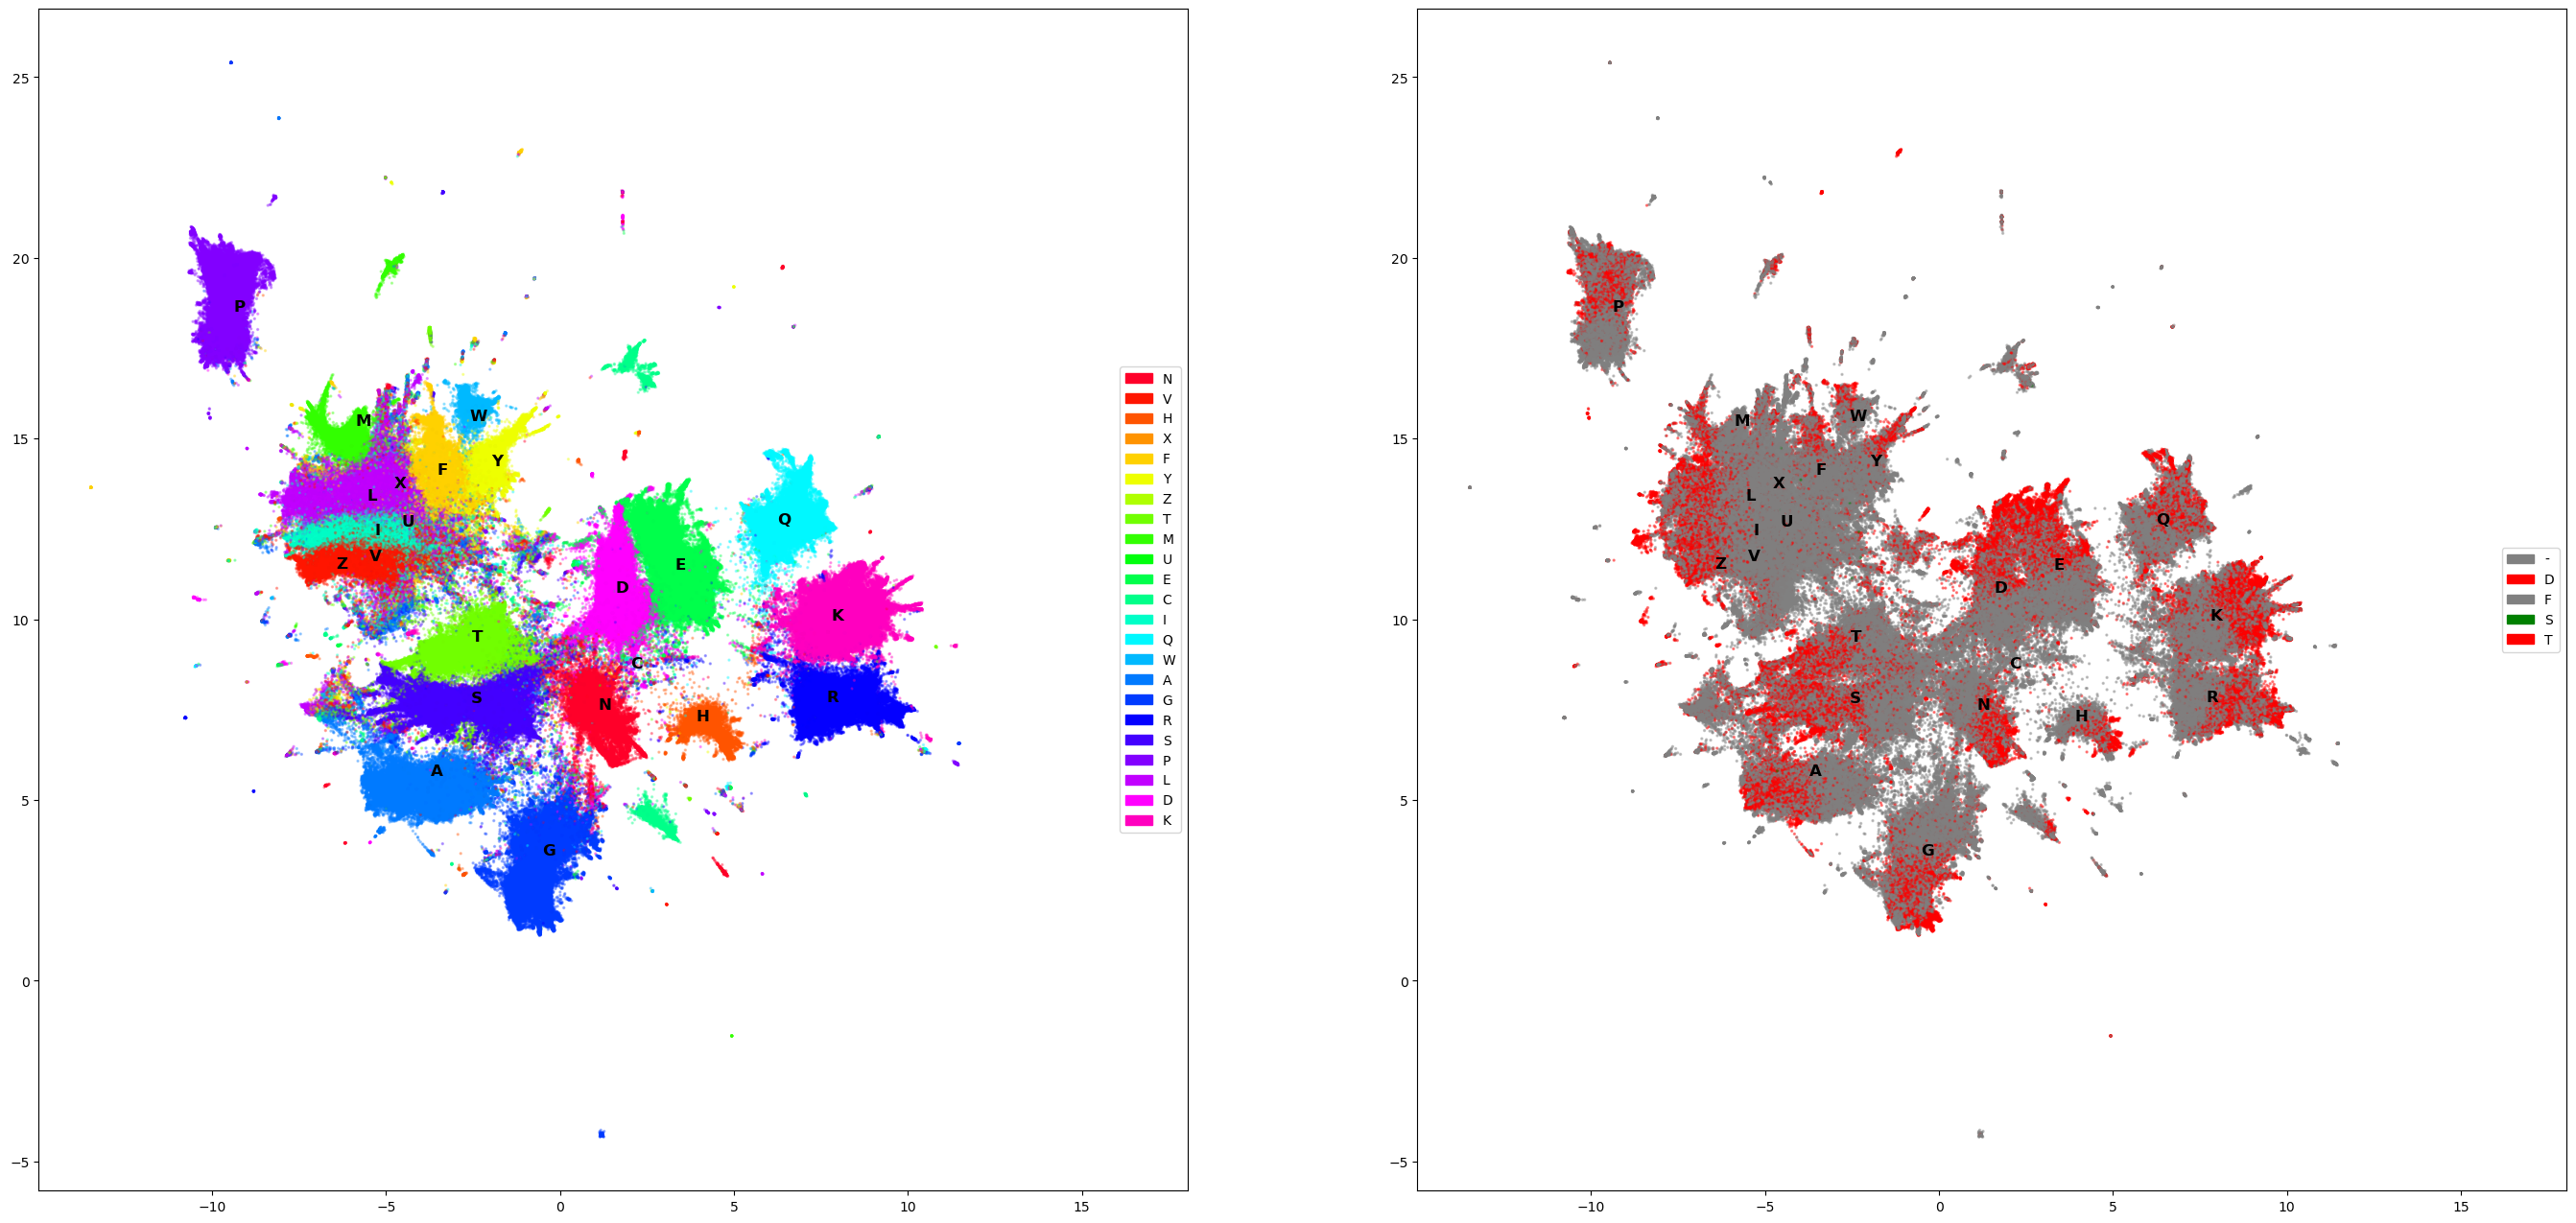

RuntimeError: No active exception to reraise

In [15]:
for key in list(umap_datadict.keys()):
    print(key)
    
    AAs = list(set(SEQ))
    cmapAA = cm.get_cmap('gist_rainbow', len(AAs))
    colordictAA = dict(zip(AAs, np.arange(0, len(AAs))))

    DDs = sorted(list(set(ANNOT)))
    colorsDD = ["gray", "red", "gray", "green", "red"]
    colordictDD = dict(zip(DDs, colorsDD))
    
    aa_means = dict()
    for aa in AAs:
        AAix = [x for x in range(0, len(SEQ)) if SEQ[x] == aa]
        embed_aa = umap_datadict[key][AAix,:]
        x_mean = np.mean(embed_aa[:,0])
        y_mean = np.mean(embed_aa[:,1])
        aa_means[aa] = (x_mean, y_mean)

    # Aminoacid colors
    fig = plt.figure(figsize=(34,16))
    ax1 = fig.add_subplot(121)
    ax1.scatter(umap_datadict[key][:,0], umap_datadict[key][:,1], s=2, alpha=0.3, 
               c=[cmapAA(colordictAA[x]) for x in SEQ])

    for aa in aa_means.keys():
        ax1.text(aa_means[aa][0], aa_means[aa][1], aa, fontsize='large', fontweight='bold')

    legend_elements = [Patch(facecolor=cmapAA(colordictAA[x]), edgecolor=cmapAA(colordictAA[x]),label=x) for x in AAs]
    ax1.legend(handles=legend_elements, loc='right')
    
    
    # Disorder / Order colors
    ax2 = fig.add_subplot(122)
    ax2.scatter(umap_datadict[key][:,0], umap_datadict[key][:,1], s=2, alpha=0.4, 
               c=[colordictDD[x] for x in ANNOT])

    for aa in aa_means.keys():
        ax2.text(aa_means[aa][0], aa_means[aa][1], aa, fontsize='large', fontweight='bold')

    legend_elements = [Patch(facecolor=colordictDD[x], edgecolor=colordictDD[x],label=x) for x in DDs]
    ax2.legend(handles=legend_elements, loc='right')
    #plt.savefig(f"disprot_plotdata/halft5/plots/umap_plot_{key}.png", bbox_inches='tight')
    plt.show()
    raise

In [ ]:
### Only plot disorder
# for key in list(umap_datadict.keys()):

#     DDs = sorted(list(set(ANNOT)))
#     colors = ["gray", "red", "gray", "green", "red"]
#     colordict = dict(zip(DDs, colors))
    
#     print(key)
#     aa_means = dict()
#     for aa in AAs:
#         AAix = [x for x in range(0, len(SEQ)) if SEQ[x] == aa]
#         embed_aa = umap_datadict[key][AAix,:]
#         x_mean = np.mean(embed_aa[:,0])
#         y_mean = np.mean(embed_aa[:,1])
#         aa_means[aa] = (x_mean, y_mean)
    

#     fig = plt.figure(figsize=(14,12))
#     ax  = fig.add_subplot(111)
#     ax.scatter(umap_datadict[key][:,0], umap_datadict[key][:,1], s=2, alpha=0.4, 
#                c=[colordict[x] for x in ANNOT])

#     for aa in aa_means.keys():
#         ax.text(aa_means[aa][0], aa_means[aa][1], aa, fontsize='large', fontweight='bold')

#     legend_elements = [Patch(facecolor=colordict[x], edgecolor=colordict[x],label=x) for x in DDs]
#     ax.legend(handles=legend_elements, loc='right')
#     plt.show()